<center> <h1>Unit 7</h1> </center>
<center> <h1>Case Study: Sentiment Analysis</h1> </center>
<center><h3>(notebook "sentiment_analysis.ipynb")</h3></center>
<br>
<br>
<br>
<center> <h3>IST 718 – Big Data Analytics</h3> </center>
<center> <h3>Daniel E. Acuna</h3> </center>
<center> <h3>http://acuna.io</h3> </center>

# Objectives:

- The Sentiment Analysis problem.  

- A simple solution without data science.  

- Application to IMDB reviews.  

- Regularized logistic regression.  

- Data-driven word sentiments.  

- Predicting sentiments in Tweets.  

- Spark ML demo.

# The Sentiment Analysis problem
- Important information about products and services are only expressed through text.  

<br>
<center><img src="./images/unit-07/unit-07-0_cssar1.png" width="90%" align="center"></center>

# The Sentiment Analysis problem (2)
<br>
<sup>Tumasjan, Andranik; O.Sprenger, Timm; G.Sandner, Philipp; M.Welpe, Isabell (2010). "**Predicting Elections with Twitter: What 140 Characters Reveal about Political Sentiment**". "Proceedings of the Fourth International AAAI Conference on Weblogs and Social Media."</sup>  

<br>
<center><img src="./images/unit-07/unit-07-0_cssar2.png" width="100%" align="center"></center>

# The Sentiment Analysis problem (3)
- From Wikipedia:
<div class="blockquote2">
  <p>Sentiment analysis refers to the use of natural language processing, text analysis and computational linguistics to identify and extract **subjective information** in source materials.</p>
</div>  

# A simple solution without much data science
- Get a list of positive words (+1) and negative words (-1).
- Compute the mean sentiment in the text based on words.
- If mean is greater than 0, then sentence is positive.

<br>
<center><img src="./images/unit-07/unit-07-0_cssar3.png" width="90%" align="center"></center>

# Application to IMDB
- IMDB  (The Internet Movie Database) contains volunteers' reviews of movies.  

- We will be using a dataset of 12.5K positive reviews and 12.5K negative reviews.  

- We assume, reviews (from 1-10) with greater than 7 had positive sentiment and less than 4 had negative sentiment.  

<br>
<sup>Andrew L. Maas, Raymond E. Daly, Peter T. Pham, Dan Huang, Andrew Y. Ng, and Christopher Potts. (2011). [Learning Word Vectors for Sentiment Analysis](http://ai.stanford.edu/~amaas/papers/wvSent_acl2011.pdf). The 49th Annual Meeting of the Association for Computational Linguistics (ACL 2011).</sup>


# Application to IMDB (2)
<br>
<center><img src="./images/unit-07/unit-07-0_cssar4.png" width="100%" align="center"></center>

# Tagging based on list of word sentiments
<br>
<center><img src="./images/unit-07/unit-07-0_cssar5.png" width="100%" align="center"></center>

# Simple model performance
- Predicting sentiment based on simple word sentiment averaging:

<br>
<center><img src="./images/unit-07/unit-07-0_cssar6.png" width="20%" align="center"></center>
<br>

- Measuring performance with accuracy is appropriate since dataset is balanced.  

- Pretty good considering that human-human correlation of rating is around 75%!


# Problems with simple approach
- Positive and negative words have the same weight (e.g., good == amazing.)  

- Maybe a couple of negative words make the entire review negative, whereas positive words do not.  

- While our dataset is artificially balanced (12500 positive and 12500 negative), there are usually more positive than negative reviews, and therefore we should bias our predictions towards positive ones.

# A data science approach
- Idea: use words in review to *predict* sentiment.  

- Using supervised data:
  - For a review "I am going to sue this hotel for how bad WiFi is" learn a function $f$ such that  
  
$$p(\text{negative} \mid \text{sentence}) = f(\theta_0 + \theta_\text{sue} + \theta_\text{hotel} + \theta_\text{bad} + \theta_\text{wifi})$$

- We are considering the average review with $\theta_0$.  

- We throw away words that "do not matter".

# From text to vectors
- We need to represent reviews as vectors so that we can estimate their weights.

- We should consider how many times a word is mentioned:  

  "This hotel is super super super good" vs "This hotel is super good."  

- There are many mechanisms for doing this.

# Consider the following documents

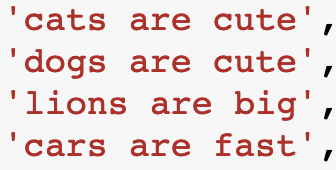

# Word counting
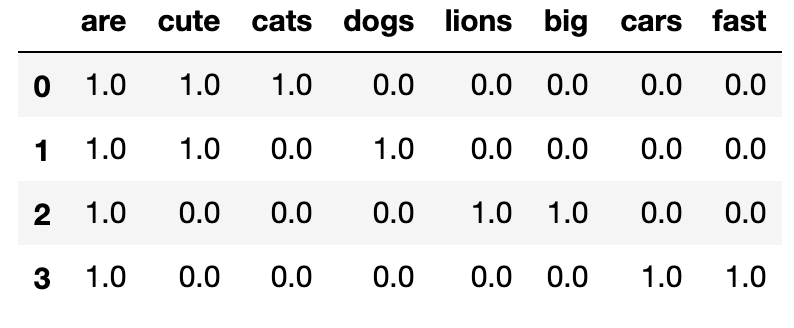
- It inflates common words: "are" would be counted as much as "cats" and "dogs".

# Term-frequency inverse document frequency
- Words common to all documents get discounted by the inverse of their frequency.  

- Raw frequencies get discounted as well:
  
  "super super super good" almost the same as "super super good"
$$
\text{tf-idf}_{ij} = f_{ij} \log \frac{|D|+1}{f_i+1}
$$

$f_i$ is number of documents that contain word $i$

# Term-frequency inverse document frequency (2)
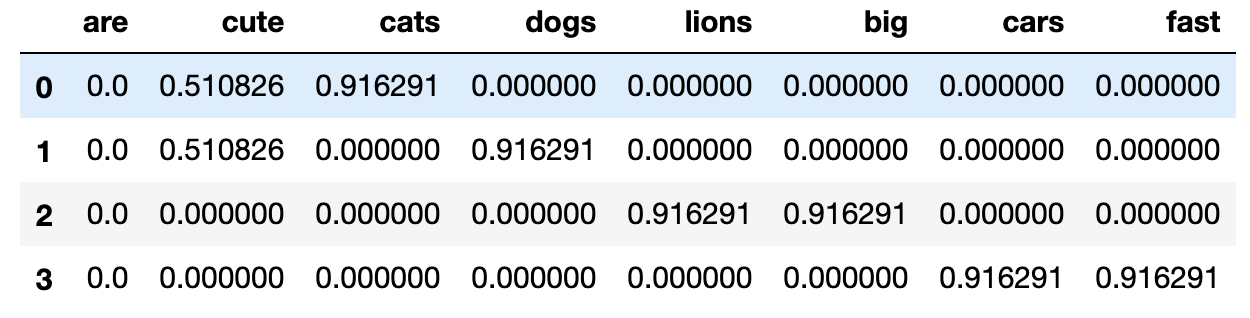

# Logistic regression
- Since sentiments are binary, we can use a classification approach known as logistic regression.  

- In logistic regression, we want to maximize the probability of our observed positive and negative examples with the following form:

$$p(y \mid X) = p_\theta(X)^y(1-p_\theta(X))^{1-y}$$  


$\qquad$where $p_\theta(X)$ is the sigmoid ($\sigma$) function:

$$p_\theta(X) = \frac{1}{1 + \exp(-(\theta_0 + \sum_{j>0} x_j\theta_j))}$$  

# Logistic regression: loss function
- We transform the reviews into TF-IDF vectors X.  

- Using positive (y=1) and negative examples (y=0), derive the loss function from:

$$p(y \mid X) = p_\theta(X)^y(1-p_\theta(X))^{1-y}$$  


$\qquad$and

$$p_\theta(X) = \frac{1}{1 + \exp(-(\theta_0 + \sum_{j>0} x_j\theta_j))}$$  

# Logistic regression to estimate sentiments
- Splits: training (60%), validation (30%), and testing (10%).  

- The loss function is:

$$L_\theta(X,Y) = -\left(\sum_i Y_i\log p_\theta(X_i) + (1-Y_i)\log (1-p_\theta(X_i))\right)$$
- Performance on validation set:

<center><img src="./images/unit-07/unit-07-0_cssar11.png" width="20%" align="center"></center>

- Much better than simple approach (73% accuracy.)


# Examining the fit
- Logistic regression estimated the weight of each word ($𝜃_\text{word}$).  
<br>
<center><img src="./images/unit-07/unit-07-0_cssar12.png" width="80%" align="center"></center>

- Therefore, we can infer which words are "negative" and which are "positive"!

# Examining the fit (2)
- Most negative words according to logistic regression.  
<center><img src="./images/unit-07/unit-07-0_cssar13.png" width="40%" align="center"></center>
- Most positive words:  
<center><img src="./images/unit-07/unit-07-0_cssar14.png" width="40%" align="center"></center>

# Something is off: overfitting
- Notice that there are 290K+ words in the dataset but only 25K reviews are used for training.  

- #features > #training examples leads to potential overfitting.  

- We could try to select features by searching but it would take too long for 290K features.

# Regularized logistic regression
- We can instead create a loss function that *penalizes learning*.  

- This approach is called *regularization*.  

- There are two main regularization methods: **L2** (or **ridge**) and **L1** (or **lasso**.)

# L2 regularization
- We build an alternative loss function where the weights of the parameters quadratically increase the loss.  

$$L_{\theta}^\lambda(X,Y) = -\left(\sum_i Y_i \log p_\theta(X_i) + (1-Y_i)\log(1-p_\theta(X_i))\right) + \lambda\sum_{j>0}\theta_j^2$$

- **We will think twice about increasing the importance of a word in the prediction unless it fits the data well**.

# L1 regularization
- One problem with L2 regularization is that all *features matter* even if by a *little*.  

- This is undesirable because intuitively some features do not matter (weight = 0.)  

- L1 solves this by imposing the following loss function:  

$$L_{\theta}^\lambda(X,Y) = -\left(\sum_i Y_i \log p_\theta(X_i) + (1-Y_i)\log(1-p_\theta(X_i))\right) + \lambda\sum_{j>0}\mid\theta_j\mid$$

- We penalize learning by the absolute value.  

- **The practical effect is that some features will have zero weight**.

# Elastic net logistic regularization
- One problem with L1 regularization is that it cannot choose more features than training examples.
- We would like to have a combination of L1 and L2.
- This is called **Elastic Net Regularization**:

$$L_{\theta}^{\lambda , \alpha}(X,Y) = -\left(\sum_i Y_i \log p_\theta(X_i) + (1-Y_i)\log(1-p_\theta(X_i))\right) + \lambda\left((1-\alpha)\sum_{j>0}\theta_j^2 + \alpha\sum_{j>0}\mid\theta_j\mid\right)$$

- $\alpha$ controls how much importance is given to L1 vs L2.
- We now have a family of models controlled by $\alpha$ and $\lambda$.

# Elastic net logistic regression (2)
- We apply elastic net logistic regression to sentiment prediction using $\alpha$=0.3 (30% L1, 70% L2) and $\lambda$=0.02.  

- Performance on validation set:

<center><img src="./images/unit-07/unit-07-0_cssar15.png" width="50%" align="center"></center>

- We improved performance from simple logistic regression (83%)!


# Word-level sentiments
- The most negative words:

<center><img src="./images/unit-07/unit-07-0_cssar16.png" width="80%" align="center"></center>

# Word-level sentiments (2)
- The most positive words:

<center><img src="./images/unit-07/unit-07-0_cssar17.png" width="20%" align="center"></center>

# Automatic feature selection with L1
- This model has 25554 features with exactly zero weight! (95% of features.)

<center><img src="./images/unit-07/unit-07-0_cssar18.png" width="17%" align="center"></center>

# How we choose $\alpha$ and $\lambda$?
- To be more formal, we should run an experiment through a grid of $\alpha$ and $\lambda$ values.
- We run $\lambda \in \{0, 0.01, 0.02\}$ and $\alpha \in \{0, 0.2, 0.4\}$
- We found the best parameter are $\alpha=0.2$ and $\lambda=0.01$.
- Final, accuracy:

<center><img src="./images/unit-07/unit-07-0_cssar19.png" width="25%" align="center"></center>

- So we went from 73%, to 83% (unregularized), 86% (regularized), to 87% (regularized grid search.)

# How should we report the final performance of our case?
- We have used the training dataset to fit each model.  

- We have used the validation dataset to compare across models.  

- But we should report, at the end, the performance of our best model on the testing data.

# Examining problems with the model
- Logistic regression produces a probability that an example belongs to a class.  

- With this, we can examine the places where our model is **most wrong** in the supervised data.  

- Also, we can examine where our model is **most confident** about a prediction.

# Applying it to Twitter data
- Applying our model to a sample of 1K tweets from Clinton and Trump, during the 2016 US presidential campaign.  

- A sample of Trump’s tweets that are negative (with high confidence):  
<br>
<center><img src="./images/unit-07/unit-07-0_cssar20.png" width="100%" align="center"></center>

# Applying it to Twitter data (2)
- A sample of Clinton’s tweets that are negative (with high confidence):  
<br>
<center><img src="./images/unit-07/unit-07-0_cssar21.png" width="100%" align="center"></center>

# Applying it to Twitter data (3)
- Positive Trump's tweets:  
<br>
<center><img src="./images/unit-07/unit-07-0_cssar22.png" width="100%" align="center"></center>

# Applying it to Twitter data (4)
- Positive Clinton's tweets:  
<br>
<center><img src="./images/unit-07/unit-07-0_cssar23.png" width="100%" align="center"></center>

# Applying it to Twitter data (5)
- And the verdict is:  
<br>
<center><img src="./images/unit-07/unit-07-0_cssar24.png" width="70%" align="center"></center>  

- Clinton is apparently significantly more negative than Trump!
- Any ideas why?

# Summary
- With supervised data, we can apply data science to model the sentiment of words and whole texts.  

- Regularized logistic regression allows to:
  1. select variables, 
  2. avoid overfitting.  
  
- Spark ML has pipelines to deal with big data science jobs, from cleaning up raw data to fitting complex statistical models.